In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #statistical test- ADF- decomposition
import matplotlib.dates as mdates # For plotting graphs 
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
import matplotlib.pyplot as plt    #graphs
%matplotlib inline
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Cars...csv')

## Exploratory Data Analysis 

In [3]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,Honda Civic,Pune,2011.0,47000.0,Petrol,Automatic,Second,13.90,1799.0,130.3,Others,5.0,4.0,NaN,4.50
5957,Hyundai i20,Delhi,2013.0,63777.0,Petrol,Manual,First,18.50,1197.0,82.9,Black/Silver,5.0,4.0,NaN,3.67
5958,Maruti Swift,Coimbatore,2016.0,37806.0,Petrol,Manual,First,20.40,1197.0,81.8,Black/Silver,5.0,4.0,NaN,5.20
5959,Mercedes-Benz SLK-Class,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,18.10,3498.0,306.0,Black/Silver,2.0,2.0,NaN,55.54


In [4]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40
5,Honda WRV,Kochi,2018.0,15135.0,Petrol,Manual,First,17.50,1199.0,88.7,White,5.0,4.0,10.57 Lakh,9.29
6,Hyundai Verna,Bangalore,2016.0,79000.0,Diesel,Manual,First,24.80,1396.0,88.7,White,5.0,4.0,NaN,7.25
7,Toyota Fortuner,Pune,2015.0,36000.0,Diesel,Automatic,First,12.55,2982.0,168.5,White,7.0,5.0,NaN,22.00
8,Toyota Innova,Hyderabad,2009.0,156056.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,8.50
9,Chevrolet Beat,Hyderabad,2012.0,61250.0,Diesel,Manual,First,25.44,936.0,57.6,Others,5.0,4.0,NaN,2.70


In [5]:
df.tail(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
5951,Honda City,Delhi,2014.0,54257.0,Petrol,Manual,First,17.40,1497.0,117.3,Others,5.0,4.0,NaN,6.25
5952,Mahindra Scorpio,Jaipur,2011.0,83000.0,Diesel,Manual,First,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.71
5953,Hyundai i20,Bangalore,2012.0,52237.0,Petrol,Manual,First,17.00,1197.0,80.0,Others,5.0,4.0,NaN,4.50
5954,Maruti Swift,Chennai,2012.0,65060.0,Diesel,Manual,First,22.90,1248.0,74.0,Others,5.0,4.0,NaN,4.80
5955,Tata Tigor,Kochi,2019.0,29279.0,Diesel,Manual,First,24.70,1047.0,69.0,Black/Silver,5.0,4.0,NaN,7.46
5956,Honda Civic,Pune,2011.0,47000.0,Petrol,Automatic,Second,13.90,1799.0,130.3,Others,5.0,4.0,NaN,4.50
5957,Hyundai i20,Delhi,2013.0,63777.0,Petrol,Manual,First,18.50,1197.0,82.9,Black/Silver,5.0,4.0,NaN,3.67
5958,Maruti Swift,Coimbatore,2016.0,37806.0,Petrol,Manual,First,20.40,1197.0,81.8,Black/Silver,5.0,4.0,NaN,5.20
5959,Mercedes-Benz SLK-Class,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,18.10,3498.0,306.0,Black/Silver,2.0,2.0,NaN,55.54
5960,Hyundai i10,Kolkata,2016.0,7000.0,Petrol,Manual,First,20.36,1197.0,78.9,White,5.0,4.0,NaN,3.60


In [6]:
df.shape

(5961, 15)

In [7]:
df.size

89415

In [8]:
print(df.info(null_counts=True,memory_usage='deep'))
print('')
sz=df.size
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      5961 non-null   object 
 1   Location                  5950 non-null   object 
 2   Year                      5959 non-null   float64
 3   Kilometers_Driven         5953 non-null   float64
 4   Fuel_Type                 5961 non-null   object 
 5   Transmission              5934 non-null   object 
 6   Owner_Type                5946 non-null   object 
 7   Mileage (Values in kmpl)  5959 non-null   float64
 8   Engine (Values in CC)     5944 non-null   float64
 9   Power (Values in bhp)     5826 non-null   float64
 10  Colour                    5950 non-null   object 
 11  Seats                     5956 non-null   float64
 12  No.                       5960 non-null   float64
 13  New_Price                 824 non-null    object 
 14  Price   

In [9]:
df.isnull().any(axis=1).value_counts()

True     5153
False     808
dtype: int64

In [10]:
print(df.isnull().sum())
miss=df.isna().sum()['New_Price']

Name                           0
Location                      11
Year                           2
Kilometers_Driven              8
Fuel_Type                      0
Transmission                  27
Owner_Type                    15
Mileage (Values in kmpl)       2
Engine (Values in CC)         17
Power (Values in bhp)        135
Colour                        11
Seats                          5
No.                            1
New_Price                   5137
Price                          0
dtype: int64


In [11]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
count,5961,5950,5959.000000,5.953000e+03,5961,5934,5946,5959.000000,5944.000000,5826.000000,5950,5956.000000,5960.000000,824,5961.000000
unique,212,11,NaN,NaN,5,2,4,NaN,NaN,NaN,3,NaN,NaN,540,NaN
top,Maruti Swift,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,White,NaN,NaN,4.78 Lakh,NaN
freq,343,781,NaN,NaN,3188,4225,4875,NaN,NaN,NaN,2115,NaN,NaN,6,NaN
mean,NaN,NaN,2013.389159,5.871110e+04,NaN,NaN,NaN,18.184499,1622.552995,113.434113,NaN,5.269140,4.114933,NaN,9.528103
std,NaN,NaN,3.243051,9.171221e+04,NaN,NaN,NaN,4.524639,601.689666,53.935723,NaN,0.789048,0.344757,NaN,11.214382
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,NaN,2.000000,2.000000,NaN,0.440000
25%,NaN,NaN,2011.500000,3.393100e+04,NaN,NaN,NaN,15.260000,1198.000000,75.000000,NaN,5.000000,4.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.160000,1493.000000,98.145000,NaN,5.000000,4.000000,NaN,5.660000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1984.000000,138.100000,NaN,5.000000,4.000000,NaN,10.000000


In [12]:
df1=pd.DataFrame(df.dropna()).copy()
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
5,Honda WRV,Kochi,2018.0,15135.0,Petrol,Manual,First,17.50,1199.0,88.70,White,5.0,4.0,10.57 Lakh,9.29
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.00,Others,5.0,4.0,60.88 Lakh,26.50
27,Maruti Vitara,Coimbatore,2018.0,64456.0,Diesel,Manual,First,24.30,1248.0,88.50,White,5.0,4.0,11 Lakh,10.46
32,Maruti Wagon,Kochi,2011.0,15466.0,Petrol,Manual,First,22.50,998.0,67.04,White,5.0,4.0,5.04 Lakh,3.36
36,Mercedes-Benz C-Class,Mumbai,2018.0,8682.0,Diesel,Automatic,First,0.00,1950.0,194.00,White,5.0,4.0,52.26 Lakh,39.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,Maruti Ciaz,Kochi,2018.0,38394.0,Petrol,Manual,First,21.56,1462.0,103.25,Others,5.0,4.0,11.37 Lakh,9.18
5892,BMW 5,Kochi,2018.0,32586.0,Diesel,Automatic,First,22.48,1995.0,190.00,Others,5.0,4.0,67.87 Lakh,37.30
5896,Renault Duster,Chennai,2012.0,80000.0,Diesel,Manual,First,19.72,1461.0,108.45,Black/Silver,5.0,4.0,15.94 Lakh,6.75
5907,BMW X3,Kochi,2017.0,36723.0,Diesel,Automatic,First,18.56,1995.0,190.00,White,5.0,4.0,64.76 Lakh,32.57


In [13]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 5 to 5944
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      808 non-null    object 
 1   Location                  808 non-null    object 
 2   Year                      808 non-null    float64
 3   Kilometers_Driven         808 non-null    float64
 4   Fuel_Type                 808 non-null    object 
 5   Transmission              808 non-null    object 
 6   Owner_Type                808 non-null    object 
 7   Mileage (Values in kmpl)  808 non-null    float64
 8   Engine (Values in CC)     808 non-null    float64
 9   Power (Values in bhp)     808 non-null    float64
 10  Colour                    808 non-null    object 
 11  Seats                     808 non-null    float64
 12  No.                       808 non-null    float64
 13  New_Price                 808 non-null    object 
 14  Price    

In [14]:
print('Unique names of the cars are:\n',df1['Name'].unique())

Unique names of the cars are:
 ['Honda WRV' 'BMW 3' 'Maruti Vitara' 'Maruti Wagon'
 'Mercedes-Benz C-Class' 'Audi A3' 'Toyota Innova' 'Hyundai Grand'
 'Maruti Alto' 'Honda Amaze' 'Audi Q3' 'Ford Ecosport' 'Honda Brio'
 'Land Rover Discovery' 'Toyota Corolla' 'Maruti Dzire' 'Volkswagen Vento'
 'Maruti Swift' 'Honda City' 'Mercedes-Benz CLA' 'Hyundai Elantra'
 'Maruti Baleno' 'Mercedes-Benz GLC' 'Tata Zest' 'Skoda Rapid'
 'Ford EcoSport' 'Hyundai Creta' 'Toyota Fortuner' 'Tata Hexa'
 'Mercedes-Benz GLE' 'Honda BRV' 'Mini Cooper' 'BMW 5' 'Volkswagen Tiguan'
 'Hyundai Verna' 'Datsun GO' 'Ford Aspire' 'Maruti Ertiga'
 'Datsun redi-GO' 'Jeep Compass' 'Audi RS5' 'Volkswagen Polo'
 'Maruti Eeco' 'Tata Bolt' 'Renault KWID' 'Toyota Etios' 'Mahindra Xylo'
 'Hyundai Xcent' 'Maruti Ignis' 'Mercedes-Benz SLC' 'BMW X1'
 'Mahindra Bolero' 'Ford Mustang' 'Maruti Celerio' 'Nissan Micra'
 'Mitsubishi Pajero' 'Tata Tiago' 'Nissan Terrano' 'Renault Duster'
 'Honda Jazz' 'Ford Figo' 'Toyota Platinum' 'Audi 

In [15]:
std=df1.nunique()['Name']
print('Total number of unique cars names are {}.'.format(std))


Total number of unique cars names are 107.


In [16]:
df[(df['Owner_Type']=='First')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40
5,Honda WRV,Kochi,2018.0,15135.0,Petrol,Manual,First,17.50,1199.0,88.7,White,5.0,4.0,10.57 Lakh,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,Tata Tigor,Kochi,2019.0,29279.0,Diesel,Manual,First,24.70,1047.0,69.0,Black/Silver,5.0,4.0,NaN,7.46
5957,Hyundai i20,Delhi,2013.0,63777.0,Petrol,Manual,First,18.50,1197.0,82.9,Black/Silver,5.0,4.0,NaN,3.67
5958,Maruti Swift,Coimbatore,2016.0,37806.0,Petrol,Manual,First,20.40,1197.0,81.8,Black/Silver,5.0,4.0,NaN,5.20
5959,Mercedes-Benz SLK-Class,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,18.10,3498.0,306.0,Black/Silver,2.0,2.0,NaN,55.54


In [17]:
df.isnull()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5959,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


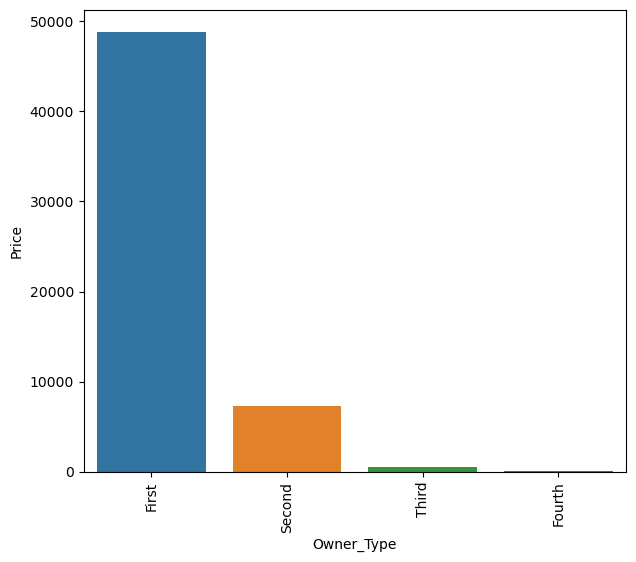

In [18]:
df2=pd.DataFrame(df.groupby('Owner_Type').sum().reset_index().sort_values(by='Price',ascending=False))
plt.figure(figsize=(7,6));
sns.barplot(x='Owner_Type',y='Price',data=df2);
plt.xticks(rotation=90);

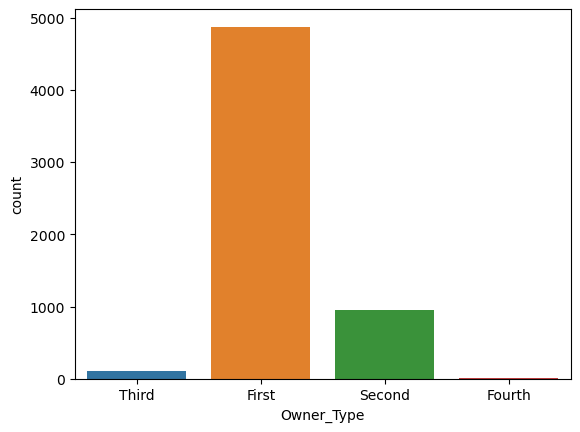

In [19]:
sns.countplot(x='Owner_Type',data=df);

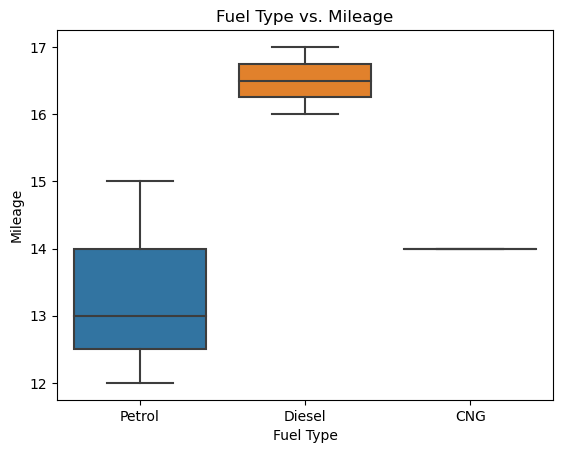

In [20]:
data = {
    'Fuel_Type': ['Petrol', 'Petrol', 'Diesel', 'CNG', 'Diesel', 'Petrol'],
    'Mileage': [15, 13, 17, 14, 16, 12]
    
}
sns.boxplot(x='Fuel_Type', y='Mileage', data=data)
plt.title('Fuel Type vs. Mileage')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()

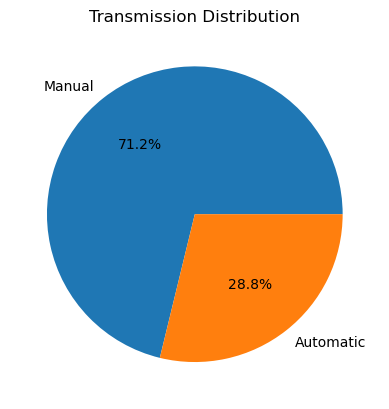

In [21]:
transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('Transmission Distribution')
plt.show()

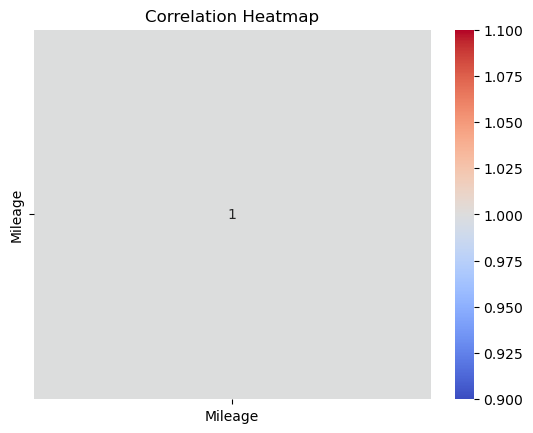

In [22]:
data = {
    'Fuel_Type': ['Petrol', 'Petrol', 'Diesel', 'CNG', 'Diesel', 'Petrol'],
    'Mileage': [15, 13, 17, 14, 16, 12],
    
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Models 

In [23]:
df1.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage (Values in kmpl)    0
Engine (Values in CC)       0
Power (Values in bhp)       0
Colour                      0
Seats                       0
No.                         0
New_Price                   0
Price                       0
dtype: int64

In [24]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
5,Honda WRV,Kochi,2018.0,15135.0,Petrol,Manual,First,17.50,1199.0,88.70,White,5.0,4.0,10.57 Lakh,9.29
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.00,Others,5.0,4.0,60.88 Lakh,26.50
27,Maruti Vitara,Coimbatore,2018.0,64456.0,Diesel,Manual,First,24.30,1248.0,88.50,White,5.0,4.0,11 Lakh,10.46
32,Maruti Wagon,Kochi,2011.0,15466.0,Petrol,Manual,First,22.50,998.0,67.04,White,5.0,4.0,5.04 Lakh,3.36
36,Mercedes-Benz C-Class,Mumbai,2018.0,8682.0,Diesel,Automatic,First,0.00,1950.0,194.00,White,5.0,4.0,52.26 Lakh,39.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,Maruti Ciaz,Kochi,2018.0,38394.0,Petrol,Manual,First,21.56,1462.0,103.25,Others,5.0,4.0,11.37 Lakh,9.18
5892,BMW 5,Kochi,2018.0,32586.0,Diesel,Automatic,First,22.48,1995.0,190.00,Others,5.0,4.0,67.87 Lakh,37.30
5896,Renault Duster,Chennai,2012.0,80000.0,Diesel,Manual,First,19.72,1461.0,108.45,Black/Silver,5.0,4.0,15.94 Lakh,6.75
5907,BMW X3,Kochi,2017.0,36723.0,Diesel,Automatic,First,18.56,1995.0,190.00,White,5.0,4.0,64.76 Lakh,32.57


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Fuel_Type', 'Transmission', 'Colour', 'Owner_Type']

for col in cols:
    df1[col] = le.fit_transform(df1[col]) 
#Through this method we convert the non numeric data into numeric data or categorial dta for the linear regression model 

In [26]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,No.,New_Price,Price
5,Honda WRV,Kochi,2018.0,15135.0,2,1,0,17.50,1199.0,88.70,2,5.0,4.0,10.57 Lakh,9.29
22,BMW 3,Mumbai,2014.0,48000.0,1,0,0,21.76,1995.0,190.00,1,5.0,4.0,60.88 Lakh,26.50
27,Maruti Vitara,Coimbatore,2018.0,64456.0,1,1,0,24.30,1248.0,88.50,2,5.0,4.0,11 Lakh,10.46
32,Maruti Wagon,Kochi,2011.0,15466.0,2,1,0,22.50,998.0,67.04,2,5.0,4.0,5.04 Lakh,3.36
36,Mercedes-Benz C-Class,Mumbai,2018.0,8682.0,1,0,0,0.00,1950.0,194.00,2,5.0,4.0,52.26 Lakh,39.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,Maruti Ciaz,Kochi,2018.0,38394.0,2,1,0,21.56,1462.0,103.25,1,5.0,4.0,11.37 Lakh,9.18
5892,BMW 5,Kochi,2018.0,32586.0,1,0,0,22.48,1995.0,190.00,1,5.0,4.0,67.87 Lakh,37.30
5896,Renault Duster,Chennai,2012.0,80000.0,1,1,0,19.72,1461.0,108.45,0,5.0,4.0,15.94 Lakh,6.75
5907,BMW X3,Kochi,2017.0,36723.0,1,0,0,18.56,1995.0,190.00,2,5.0,4.0,64.76 Lakh,32.57


In [27]:
df1target = df1.loc[:, 'Price']
df1target

# For the linear regression model, First we target the 1 column like we target the price beacuse we predict the price 

5        9.29
22      26.50
27      10.46
32       3.36
36      39.50
        ...  
5884     9.18
5892    37.30
5896     6.75
5907    32.57
5944     6.95
Name: Price, Length: 808, dtype: float64

In [29]:
df1features = df1.loc[:, ['Year','Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage (Values in kmpl)', 'Engine (Values in CC)', 'Power (Values in bhp)', 'Colour', 'Seats']]
df1features

# here is the features of the target, basically its means the Price will be depend on this variables 

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats
5,2018.0,15135.0,2,1,0,17.50,1199.0,88.70,2,5.0
22,2014.0,48000.0,1,0,0,21.76,1995.0,190.00,1,5.0
27,2018.0,64456.0,1,1,0,24.30,1248.0,88.50,2,5.0
32,2011.0,15466.0,2,1,0,22.50,998.0,67.04,2,5.0
36,2018.0,8682.0,1,0,0,0.00,1950.0,194.00,2,5.0
...,...,...,...,...,...,...,...,...,...,...
5884,2018.0,38394.0,2,1,0,21.56,1462.0,103.25,1,5.0
5892,2018.0,32586.0,1,0,0,22.48,1995.0,190.00,1,5.0
5896,2012.0,80000.0,1,1,0,19.72,1461.0,108.45,0,5.0
5907,2017.0,36723.0,1,0,0,18.56,1995.0,190.00,2,5.0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1features, df1target, test_size=0.30, random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
for col_name, coef in zip(X_train.columns, model.coef_):
    print("The coefficient for {} is {}".format(col_name, coef))


The coefficient for Year is 1.245873092039301
The coefficient for Kilometers_Driven is -4.508463151689213e-05
The coefficient for Fuel_Type is -3.904855068378797
The coefficient for Transmission is -3.3048197678802937
The coefficient for Owner_Type is 1.2273194313923446
The coefficient for Mileage (Values in kmpl) is -0.1396964662541409
The coefficient for Engine (Values in CC) is 0.007652740254027849
The coefficient for Power (Values in bhp) is 0.12287953386643413
The coefficient for Colour is 0.1431160384128324
The coefficient for Seats is -2.8709835593853734


In [34]:
# Let us check the intercept for the model

intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))


The intercept for our model is -2497.233784352562


In [35]:
# R square on testing data
model.score(X_train, y_train)

0.6900187999997103

In [39]:
#RMSE on Traning data
import numpy as np
from sklearn import metrics

# RMSE on Training data
predicted_train = model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

9.016952756650008

In [40]:
#RMSE on Testing data
predicted_test=model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

6.7444640388270365

## Linear Regression using statsmodels

In [57]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train],axis =1)
data_train.head(10)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (Values in kmpl),Engine (Values in CC),Power (Values in bhp),Colour,Seats,Price
595,2015.0,19000.0,2,0,0,18.00,1497.0,117.30,0,5.0,8.95
3080,2015.0,65012.0,1,1,0,14.24,2755.0,174.50,2,7.0,18.90
4114,2016.0,54000.0,1,1,0,19.87,1461.0,83.80,1,5.0,6.50
4171,2012.0,30000.0,2,1,0,22.50,998.0,67.04,2,5.0,3.30
4120,2019.0,14298.0,2,0,0,13.33,2995.0,340.00,1,5.0,2.02
616,2017.0,43000.0,1,1,0,13.68,2393.0,147.80,2,7.0,18.65
734,2017.0,27001.0,1,0,0,20.68,1995.0,190.00,1,5.0,29.00
146,2012.0,150000.0,1,1,2,28.40,1248.0,73.75,2,5.0,2.25
2613,2017.0,21000.0,1,0,0,19.33,1999.0,177.00,0,5.0,52.00
1278,2014.0,53817.0,1,1,0,25.47,1248.0,88.50,2,7.0,7.56


In [58]:
data_train.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage (Values in kmpl)', 'Engine (Values in CC)',
       'Power (Values in bhp)', 'Colour', 'Seats', 'Price'],
      dtype='object')

In [62]:


x_columns = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage (Values in kmpl)', 'Engine (Values in CC)',
       'Power (Values in bhp)', 'Colour', 'Seats']
y = df1['Price']



In [65]:
def get_stats():
    x_columns = ['Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage (Values in kmpl)', 'Engine (Values in CC)', 'Power (Values in bhp)', 'Colour', 'Seats']
    x = df1[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())

get_stats()


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              383.3
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                   6.65e-283
Time:                        23:59:13   Log-Likelihood:                         -2904.6
No. Observations:                 808   AIC:                                      5827.
Df Residuals:                     799   BIC:                                      5869.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [69]:
model.fit(df1[x_columns],y)


LinearRegression()

In [70]:
y_pred = model.predict(df1[x_columns])

In [71]:
y_pred

array([ 8.59606285e+00,  2.64132542e+01,  9.51199960e+00, -4.70308221e+00,
        3.70926890e+01,  2.26415389e+01,  2.11863821e+01,  2.10474548e+01,
        4.42144668e+00, -6.96198817e+00,  8.34593876e+00,  2.81620181e+01,
        1.53459949e+01,  2.77291002e+01,  1.00118750e+01,  4.05996430e+01,
        7.68650341e+00, -3.17420082e+00,  9.46924367e+00,  4.87949002e+00,
        1.65458506e+01,  2.35720003e+01,  2.60626310e+01,  2.67719472e+01,
        1.54752674e+01,  1.79815805e+01,  7.45892183e+00,  1.07587755e+01,
        3.12397939e+01,  6.08520538e+00,  1.37738288e+01,  1.06087112e+01,
        1.53853003e+01,  2.99319045e+01, -5.70633620e+00,  4.46768789e+00,
        2.61189402e+01,  1.30214675e+00,  3.37351633e+01,  1.97653246e+01,
        1.61696120e+01,  1.20886105e+01,  1.18952884e+01,  1.76356434e+01,
        1.22041504e+01,  2.33126841e+01,  1.06192112e-01,  2.36142376e+01,
        2.64678675e+01,  6.99849151e+00,  9.74167165e+00,  2.40764222e+01,
       -9.24042926e-01,  

In [72]:
y

5        9.29
22      26.50
27      10.46
32       3.36
36      39.50
        ...  
5884     9.18
5892    37.30
5896     6.75
5907    32.57
5944     6.95
Name: Price, Length: 808, dtype: float64

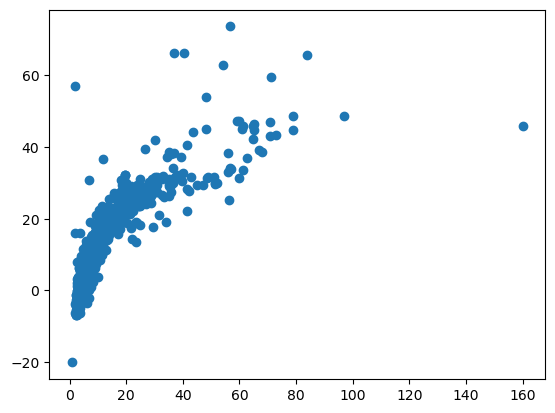

In [73]:
import matplotlib.pyplot

matplotlib.pyplot.scatter(y, y_pred)
matplotlib.pyplot.show()